# The Euler Characteristic: A Topological Invariant

## Introduction

The **Euler characteristic** is one of the most fundamental topological invariants in mathematics. Named after the Swiss mathematician Leonhard Euler, it provides a powerful way to classify and distinguish topological spaces.

## Historical Background

In 1758, Euler discovered a remarkable relationship for convex polyhedra. For any convex polyhedron, the number of vertices ($V$), edges ($E$), and faces ($F$) satisfy:

$$V - E + F = 2$$

This formula, known as **Euler's polyhedron formula**, was later generalized to become the Euler characteristic.

## Definition

### For Polyhedra and Simplicial Complexes

For a simplicial complex $K$, the Euler characteristic $\chi(K)$ is defined as the alternating sum:

$$\chi(K) = \sum_{i=0}^{n} (-1)^i \, c_i$$

where $c_i$ is the number of $i$-dimensional simplices in $K$.

For a polyhedron:
- $c_0 = V$ (vertices, 0-simplices)
- $c_1 = E$ (edges, 1-simplices)
- $c_2 = F$ (faces, 2-simplices)

Thus: $\chi = V - E + F$

### Topological Definition via Homology

For a topological space $X$ with finitely generated homology groups, the Euler characteristic can be computed using Betti numbers:

$$\chi(X) = \sum_{i=0}^{n} (-1)^i \, b_i$$

where $b_i = \text{rank}(H_i(X))$ is the $i$-th Betti number.

## Key Properties

1. **Topological Invariance**: $\chi$ is preserved under homeomorphisms
2. **Homotopy Invariance**: $\chi$ is preserved under homotopy equivalence
3. **Additivity**: For disjoint spaces: $\chi(X \sqcup Y) = \chi(X) + \chi(Y)$
4. **Inclusion-Exclusion**: $\chi(X \cup Y) = \chi(X) + \chi(Y) - \chi(X \cap Y)$
5. **Product Formula**: $\chi(X \times Y) = \chi(X) \cdot \chi(Y)$

## Examples of Euler Characteristics

| Surface | $\chi$ | Genus $g$ |
|---------|--------|----------|
| Sphere $S^2$ | 2 | 0 |
| Torus $T^2$ | 0 | 1 |
| Double Torus | -2 | 2 |
| Projective Plane $\mathbb{RP}^2$ | 1 | — |
| Klein Bottle | 0 | — |

For orientable surfaces of genus $g$:
$$\chi = 2 - 2g$$

For non-orientable surfaces with $k$ crosscaps:
$$\chi = 2 - k$$

## Computational Implementation

We will implement functions to compute the Euler characteristic for various polyhedra and demonstrate the invariance properties.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from collections import defaultdict

def euler_characteristic(V, E, F):
    """
    Compute Euler characteristic for a polyhedron.
    
    Parameters:
    -----------
    V : int - Number of vertices
    E : int - Number of edges
    F : int - Number of faces
    
    Returns:
    --------
    int : Euler characteristic χ = V - E + F
    """
    return V - E + F

def euler_from_betti(betti_numbers):
    """
    Compute Euler characteristic from Betti numbers.
    
    Parameters:
    -----------
    betti_numbers : list - List of Betti numbers [b_0, b_1, b_2, ...]
    
    Returns:
    --------
    int : Euler characteristic χ = Σ(-1)^i * b_i
    """
    chi = 0
    for i, b in enumerate(betti_numbers):
        chi += ((-1) ** i) * b
    return chi

print("Euler Characteristic Calculator Initialized")

Euler Characteristic Calculator Initialized


## Platonic Solids Verification

The five Platonic solids all satisfy Euler's formula with $\chi = 2$:

In [2]:
# Platonic solids: name, vertices, edges, faces
platonic_solids = [
    ("Tetrahedron", 4, 6, 4),
    ("Cube (Hexahedron)", 8, 12, 6),
    ("Octahedron", 6, 12, 8),
    ("Dodecahedron", 20, 30, 12),
    ("Icosahedron", 12, 30, 20)
]

print("Euler Characteristic for Platonic Solids")
print("=" * 55)
print(f"{'Solid':<20} {'V':>5} {'E':>5} {'F':>5} {'χ=V-E+F':>10}")
print("-" * 55)

for name, V, E, F in platonic_solids:
    chi = euler_characteristic(V, E, F)
    print(f"{name:<20} {V:>5} {E:>5} {F:>5} {chi:>10}")

print("-" * 55)
print("All Platonic solids have χ = 2 (homeomorphic to S²)")

Euler Characteristic for Platonic Solids
Solid                    V     E     F    χ=V-E+F
-------------------------------------------------------
Tetrahedron              4     6     4          2
Cube (Hexahedron)        8    12     6          2
Octahedron               6    12     8          2
Dodecahedron            20    30    12          2
Icosahedron             12    30    20          2
-------------------------------------------------------
All Platonic solids have χ = 2 (homeomorphic to S²)


## Betti Numbers and Euler Characteristic

The Euler characteristic can be computed from Betti numbers:
- $b_0$: number of connected components
- $b_1$: number of "holes" (1-dimensional cycles)
- $b_2$: number of "voids" (2-dimensional cavities)

In [3]:
# Common spaces with their Betti numbers
spaces = [
    ("Point", [1]),
    ("Circle S¹", [1, 1]),
    ("Sphere S²", [1, 0, 1]),
    ("Torus T²", [1, 2, 1]),
    ("Double Torus", [1, 4, 1]),
    ("Klein Bottle", [1, 1, 0]),  # Non-orientable
    ("Real Proj. Plane RP²", [1, 0, 0]),  # Non-orientable
    ("3-Sphere S³", [1, 0, 0, 1]),
]

print("Euler Characteristic from Betti Numbers")
print("=" * 60)
print(f"{'Space':<25} {'Betti Numbers':>20} {'χ':>8}")
print("-" * 60)

for name, betti in spaces:
    chi = euler_from_betti(betti)
    betti_str = str(betti)
    print(f"{name:<25} {betti_str:>20} {chi:>8}")

print("-" * 60)

Euler Characteristic from Betti Numbers
Space                            Betti Numbers        χ
------------------------------------------------------------
Point                                      [1]        1
Circle S¹                               [1, 1]        0
Sphere S²                            [1, 0, 1]        2
Torus T²                             [1, 2, 1]        0
Double Torus                         [1, 4, 1]       -2
Klein Bottle                         [1, 1, 0]        0
Real Proj. Plane RP²                 [1, 0, 0]        1
3-Sphere S³                       [1, 0, 0, 1]        0
------------------------------------------------------------


## Genus and Euler Characteristic

For closed orientable surfaces, the Euler characteristic determines the genus:

$$g = \frac{2 - \chi}{2}$$

Let's visualize this relationship:

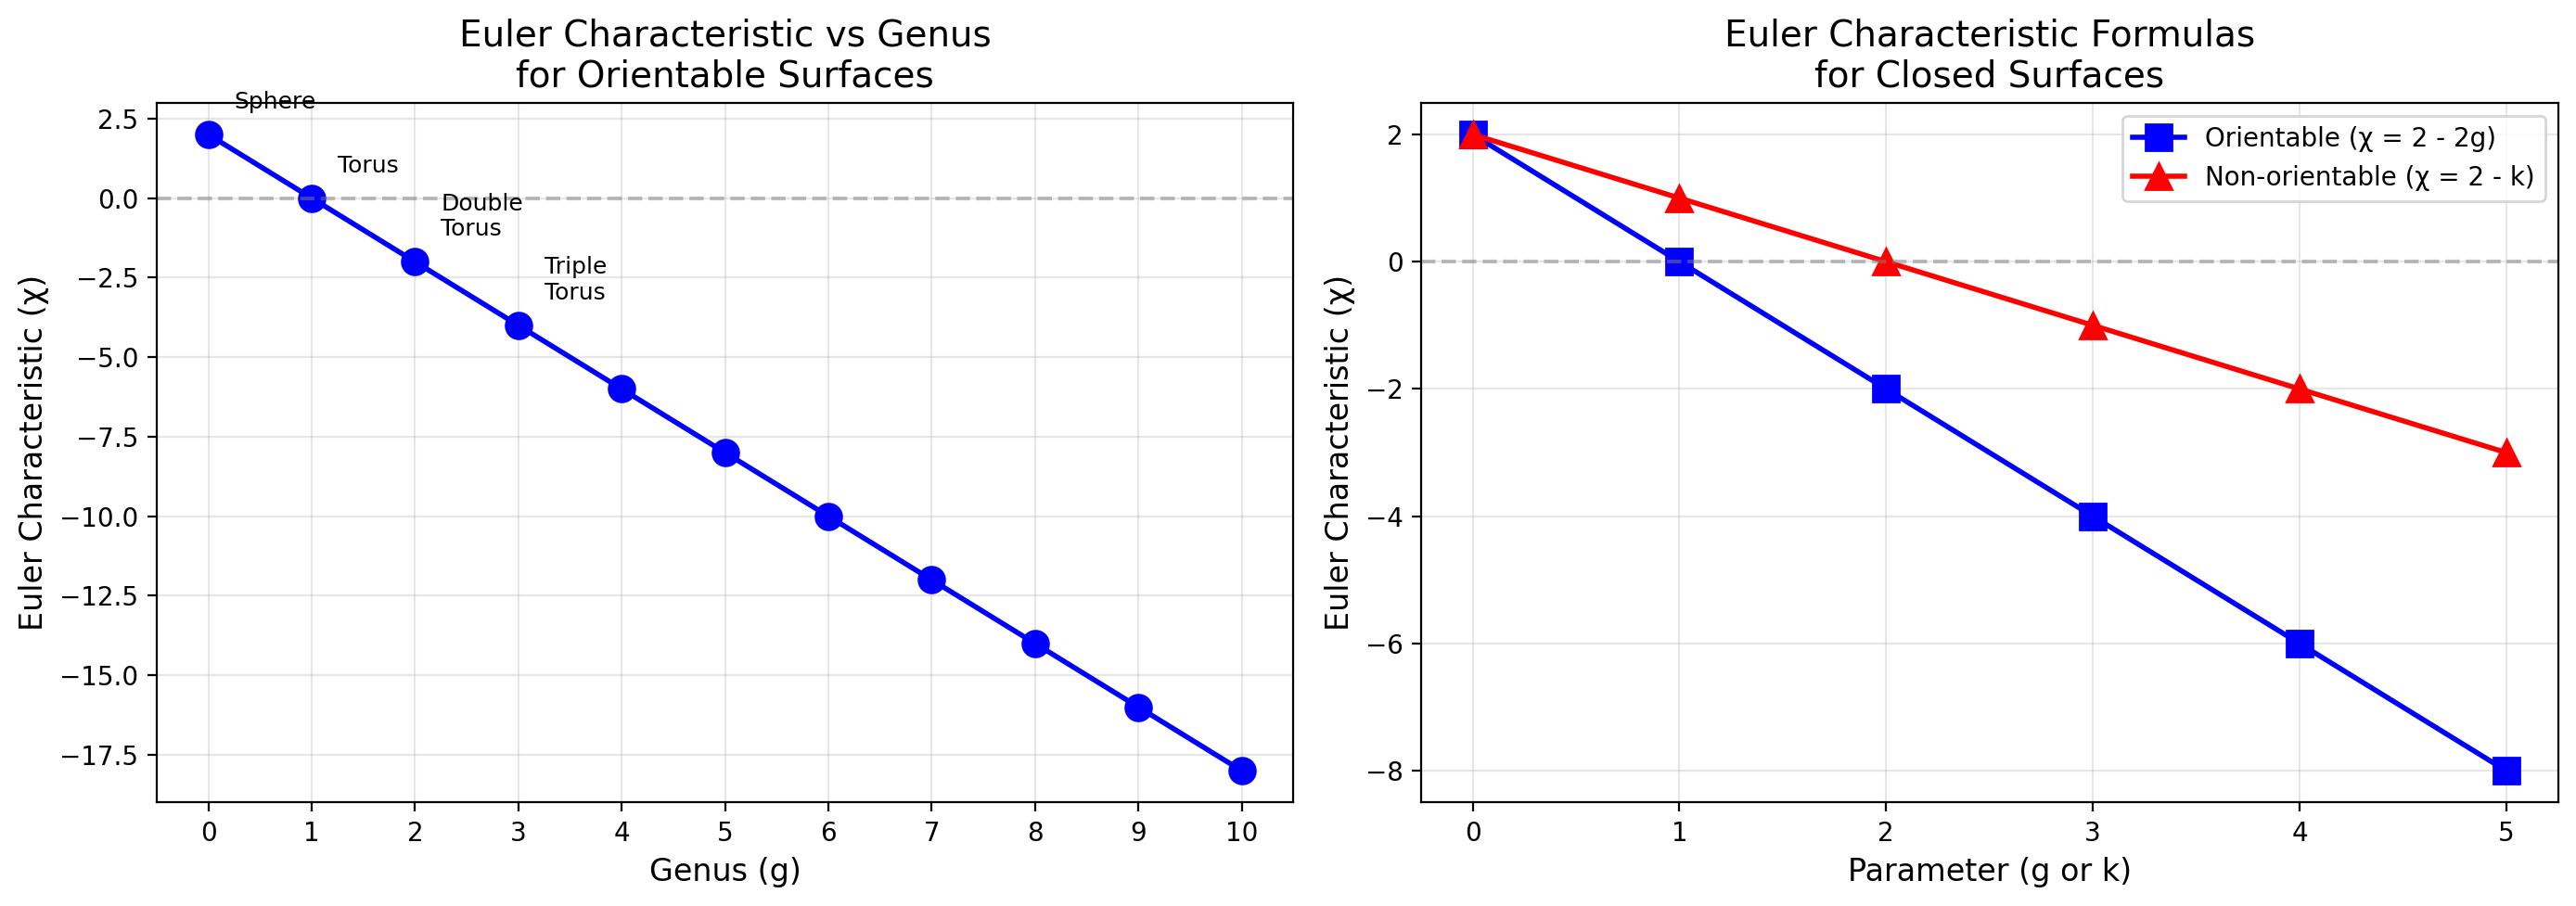


Plot saved to 'plot.png'


In [4]:
def genus_from_chi(chi):
    """Calculate genus of orientable surface from Euler characteristic."""
    return (2 - chi) / 2

def chi_from_genus(g):
    """Calculate Euler characteristic from genus."""
    return 2 - 2 * g

# Generate data for orientable surfaces
genera = np.arange(0, 11)
chi_values = [chi_from_genus(g) for g in genera]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: χ vs genus
ax1.plot(genera, chi_values, 'bo-', markersize=10, linewidth=2)
ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax1.set_xlabel('Genus (g)', fontsize=12)
ax1.set_ylabel('Euler Characteristic (χ)', fontsize=12)
ax1.set_title('Euler Characteristic vs Genus\nfor Orientable Surfaces', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(genera)

# Annotate specific surfaces
surface_names = ['Sphere', 'Torus', 'Double\nTorus', 'Triple\nTorus']
for i, name in enumerate(surface_names[:4]):
    ax1.annotate(name, (genera[i], chi_values[i]), 
                textcoords="offset points", xytext=(10, 10),
                fontsize=9, ha='left')

# Plot 2: Comparison of different surface types
surface_types = ['Orientable\n(genus g)', 'Non-orientable\n(k crosscaps)']
n_values = np.arange(0, 6)

# Orientable: χ = 2 - 2g
chi_orientable = 2 - 2 * n_values
# Non-orientable: χ = 2 - k
chi_nonorientable = 2 - n_values

ax2.plot(n_values, chi_orientable, 'bs-', markersize=10, linewidth=2, label='Orientable (χ = 2 - 2g)')
ax2.plot(n_values, chi_nonorientable, 'r^-', markersize=10, linewidth=2, label='Non-orientable (χ = 2 - k)')
ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax2.set_xlabel('Parameter (g or k)', fontsize=12)
ax2.set_ylabel('Euler Characteristic (χ)', fontsize=12)
ax2.set_title('Euler Characteristic Formulas\nfor Closed Surfaces', fontsize=14)
ax2.legend(loc='upper right', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('euler_characteristic_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Triangulations and Euler Characteristic

Any triangulation of a surface must satisfy Euler's formula. Let's verify this for different triangulations of a sphere:

In [5]:
def verify_triangulation(name, vertices, faces):
    """
    Verify Euler characteristic for a triangulated surface.
    
    Parameters:
    -----------
    name : str - Name of the triangulation
    vertices : list of tuples - 3D coordinates of vertices
    faces : list of tuples - Vertex indices for each triangular face
    """
    V = len(vertices)
    F = len(faces)
    
    # Count edges (each edge is shared by exactly 2 faces in a closed surface)
    edges = set()
    for face in faces:
        for i in range(3):
            edge = tuple(sorted([face[i], face[(i+1) % 3]]))
            edges.add(edge)
    E = len(edges)
    
    chi = V - E + F
    
    print(f"{name}:")
    print(f"  V = {V}, E = {E}, F = {F}")
    print(f"  χ = V - E + F = {V} - {E} + {F} = {chi}")
    return chi, vertices, faces, edges

# Tetrahedron (minimal triangulation of sphere)
tet_vertices = [
    (1, 1, 1), (-1, -1, 1), (-1, 1, -1), (1, -1, -1)
]
tet_faces = [
    (0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)
]

# Octahedron triangulation
oct_vertices = [
    (1, 0, 0), (-1, 0, 0), (0, 1, 0), (0, -1, 0), (0, 0, 1), (0, 0, -1)
]
oct_faces = [
    (0, 2, 4), (2, 1, 4), (1, 3, 4), (3, 0, 4),
    (0, 2, 5), (2, 1, 5), (1, 3, 5), (3, 0, 5)
]

# Icosahedron triangulation
phi = (1 + np.sqrt(5)) / 2  # Golden ratio
ico_vertices = [
    (0, 1, phi), (0, -1, phi), (0, 1, -phi), (0, -1, -phi),
    (1, phi, 0), (-1, phi, 0), (1, -phi, 0), (-1, -phi, 0),
    (phi, 0, 1), (-phi, 0, 1), (phi, 0, -1), (-phi, 0, -1)
]
ico_faces = [
    (0, 1, 8), (0, 8, 4), (0, 4, 5), (0, 5, 9), (0, 9, 1),
    (1, 6, 8), (8, 6, 10), (8, 10, 4), (4, 10, 2), (4, 2, 5),
    (5, 2, 11), (5, 11, 9), (9, 11, 7), (9, 7, 1), (1, 7, 6),
    (3, 6, 7), (3, 7, 11), (3, 11, 2), (3, 2, 10), (3, 10, 6)
]

print("Triangulations of the Sphere")
print("=" * 40)

results = [
    verify_triangulation("Tetrahedron", tet_vertices, tet_faces),
    verify_triangulation("Octahedron", oct_vertices, oct_faces),
    verify_triangulation("Icosahedron", ico_vertices, ico_faces)
]

print("\nAll triangulations give χ = 2, confirming topological invariance!")

Triangulations of the Sphere
Tetrahedron:
  V = 4, E = 6, F = 4
  χ = V - E + F = 4 - 6 + 4 = 2
Octahedron:
  V = 6, E = 12, F = 8
  χ = V - E + F = 6 - 12 + 8 = 2
Icosahedron:
  V = 12, E = 30, F = 20
  χ = V - E + F = 12 - 30 + 20 = 2

All triangulations give χ = 2, confirming topological invariance!


## 3D Visualization of Polyhedra

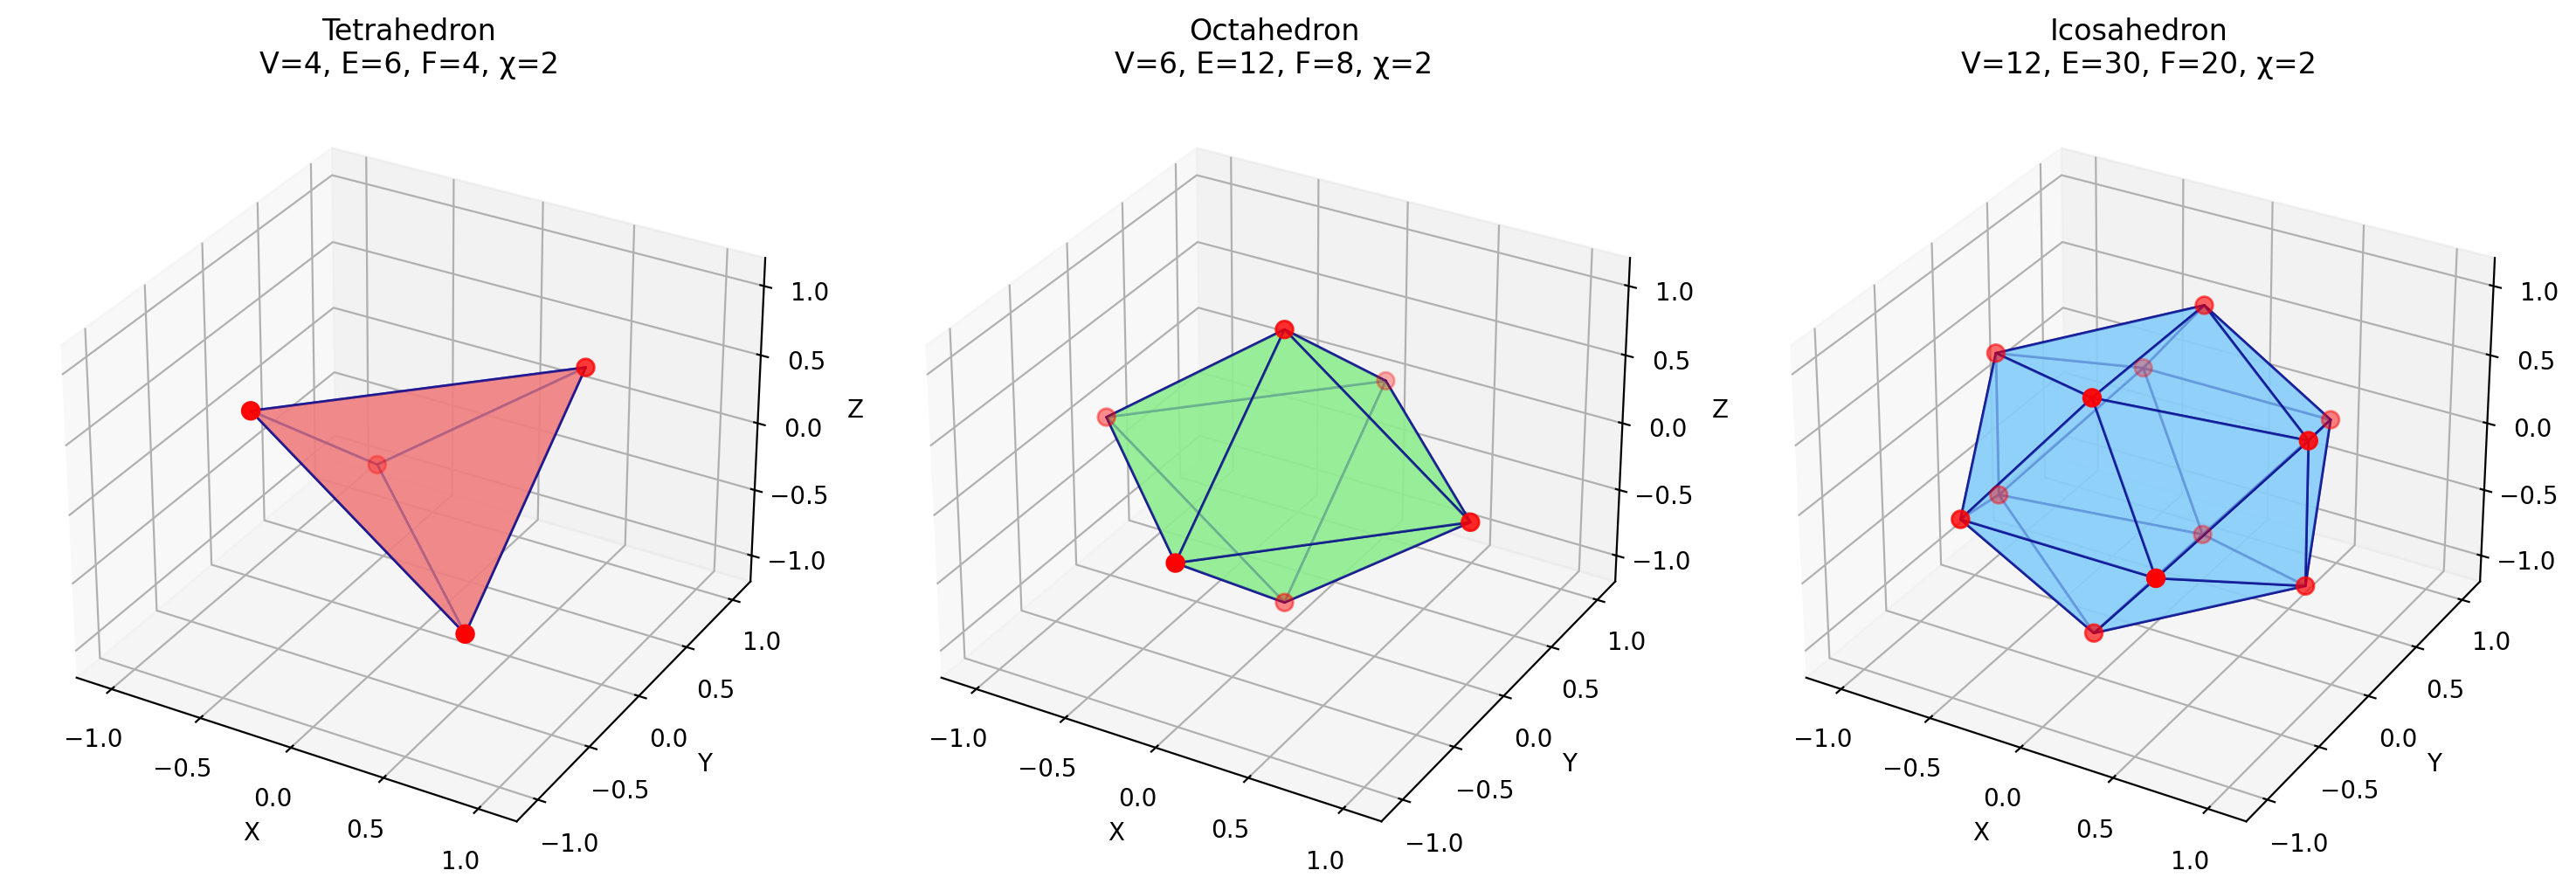


3D visualization saved to 'plot.png'


In [6]:
def plot_polyhedron(ax, vertices, faces, title, color='skyblue'):
    """
    Plot a 3D polyhedron.
    """
    vertices = np.array(vertices, dtype=float)
    
    # Normalize vertices to unit sphere
    norms = np.linalg.norm(vertices, axis=1, keepdims=True)
    vertices = vertices / norms.max()
    
    # Create polygon collection for faces
    poly3d = [[vertices[idx] for idx in face] for face in faces]
    
    ax.add_collection3d(Poly3DCollection(
        poly3d, alpha=0.7, facecolor=color, 
        edgecolor='darkblue', linewidth=1
    ))
    
    # Plot vertices
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], 
               c='red', s=50, zorder=5)
    
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])
    ax.set_zlim([-1.2, 1.2])
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

fig = plt.figure(figsize=(15, 5))

polyhedra = [
    (tet_vertices, tet_faces, "Tetrahedron\nV=4, E=6, F=4, χ=2", 'lightcoral'),
    (oct_vertices, oct_faces, "Octahedron\nV=6, E=12, F=8, χ=2", 'lightgreen'),
    (ico_vertices, ico_faces, "Icosahedron\nV=12, E=30, F=20, χ=2", 'lightskyblue')
]

for i, (verts, faces, title, color) in enumerate(polyhedra):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    plot_polyhedron(ax, verts, faces, title, color)

plt.tight_layout()
plt.savefig('euler_characteristic_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n3D visualization saved to 'plot.png'")

## The Gauss-Bonnet Theorem

The **Gauss-Bonnet theorem** connects the Euler characteristic to differential geometry:

$$\int_M K \, dA = 2\pi \chi(M)$$

where $K$ is the Gaussian curvature and $M$ is a compact surface.

For a sphere of radius $R$, $K = 1/R^2$ everywhere, so:
$$\int_{S^2} \frac{1}{R^2} \, dA = \frac{1}{R^2} \cdot 4\pi R^2 = 4\pi = 2\pi \cdot 2$$

confirming $\chi(S^2) = 2$.

In [7]:
def gauss_bonnet_sphere(R):
    """Verify Gauss-Bonnet for a sphere of radius R."""
    K = 1 / R**2  # Constant Gaussian curvature
    A = 4 * np.pi * R**2  # Surface area
    total_curvature = K * A
    chi = total_curvature / (2 * np.pi)
    return total_curvature, chi

print("Gauss-Bonnet Verification for Spheres")
print("=" * 50)

for R in [0.5, 1.0, 2.0, 5.0]:
    total_curv, chi = gauss_bonnet_sphere(R)
    print(f"R = {R:.1f}: ∫K dA = {total_curv:.4f} = 2π × {chi:.4f}")

print("\nThe Euler characteristic χ = 2 is independent of radius!")

Gauss-Bonnet Verification for Spheres
R = 0.5: ∫K dA = 12.5664 = 2π × 2.0000
R = 1.0: ∫K dA = 12.5664 = 2π × 2.0000
R = 2.0: ∫K dA = 12.5664 = 2π × 2.0000
R = 5.0: ∫K dA = 12.5664 = 2π × 2.0000

The Euler characteristic χ = 2 is independent of radius!


## Product Formula Demonstration

For the Cartesian product of spaces:
$$\chi(X \times Y) = \chi(X) \cdot \chi(Y)$$

Let's verify some examples:

In [8]:
# Define χ for basic spaces
chi_values = {
    "Point": 1,
    "S⁰ (2 points)": 2,
    "S¹ (circle)": 0,
    "S² (sphere)": 2,
    "D² (disk)": 1,
    "I (interval)": 1
}

print("Product Formula: χ(X × Y) = χ(X) · χ(Y)")
print("=" * 60)

products = [
    ("S¹ (circle)", "S¹ (circle)", "T² (torus)"),
    ("S² (sphere)", "Point", "S² (sphere)"),
    ("S¹ (circle)", "I (interval)", "Cylinder"),
    ("S⁰ (2 points)", "S¹ (circle)", "2 circles"),
    ("S² (sphere)", "S² (sphere)", "S² × S²"),
]

for X, Y, result_name in products:
    chi_X = chi_values[X]
    chi_Y = chi_values[Y]
    chi_product = chi_X * chi_Y
    print(f"χ({X}) × χ({Y}) = {chi_X} × {chi_Y} = {chi_product}")
    print(f"  → χ({result_name}) = {chi_product}")
    print()

Product Formula: χ(X × Y) = χ(X) · χ(Y)
χ(S¹ (circle)) × χ(S¹ (circle)) = 0 × 0 = 0
  → χ(T² (torus)) = 0

χ(S² (sphere)) × χ(Point) = 2 × 1 = 2
  → χ(S² (sphere)) = 2

χ(S¹ (circle)) × χ(I (interval)) = 0 × 1 = 0
  → χ(Cylinder) = 0

χ(S⁰ (2 points)) × χ(S¹ (circle)) = 2 × 0 = 0
  → χ(2 circles) = 0

χ(S² (sphere)) × χ(S² (sphere)) = 2 × 2 = 4
  → χ(S² × S²) = 4



## Euler Characteristic of Graphs

For a connected graph $G$, the Euler characteristic is:
$$\chi(G) = V - E$$

For a tree (connected, no cycles): $\chi = 1$

For a graph with $c$ connected components and $h$ independent cycles:
$$\chi = c - h$$

In [9]:
def graph_euler_characteristic(V, E, components=1):
    """
    Compute Euler characteristic of a graph.
    
    Returns χ = V - E
    For a connected graph, χ = 1 - (number of independent cycles)
    """
    return V - E

print("Euler Characteristic of Graphs")
print("=" * 50)

graphs = [
    ("Single vertex", 1, 0),
    ("Path (n=5)", 5, 4),
    ("Star (n=5)", 5, 4),
    ("Cycle (n=5)", 5, 5),
    ("Complete K₄", 4, 6),
    ("Complete K₅", 5, 10),
    ("Petersen graph", 10, 15),
]

print(f"{'Graph':<20} {'V':>5} {'E':>5} {'χ=V-E':>8} {'Cycles':>8}")
print("-" * 50)

for name, V, E in graphs:
    chi = graph_euler_characteristic(V, E)
    cycles = 1 - chi  # For connected graphs
    print(f"{name:<20} {V:>5} {E:>5} {chi:>8} {cycles:>8}")

Euler Characteristic of Graphs
Graph                    V     E    χ=V-E   Cycles
--------------------------------------------------
Single vertex            1     0        1        0
Path (n=5)               5     4        1        0
Star (n=5)               5     4        1        0
Cycle (n=5)              5     5        0        1
Complete K₄              4     6       -2        3
Complete K₅              5    10       -5        6
Petersen graph          10    15       -5        6


## Final Comprehensive Visualization

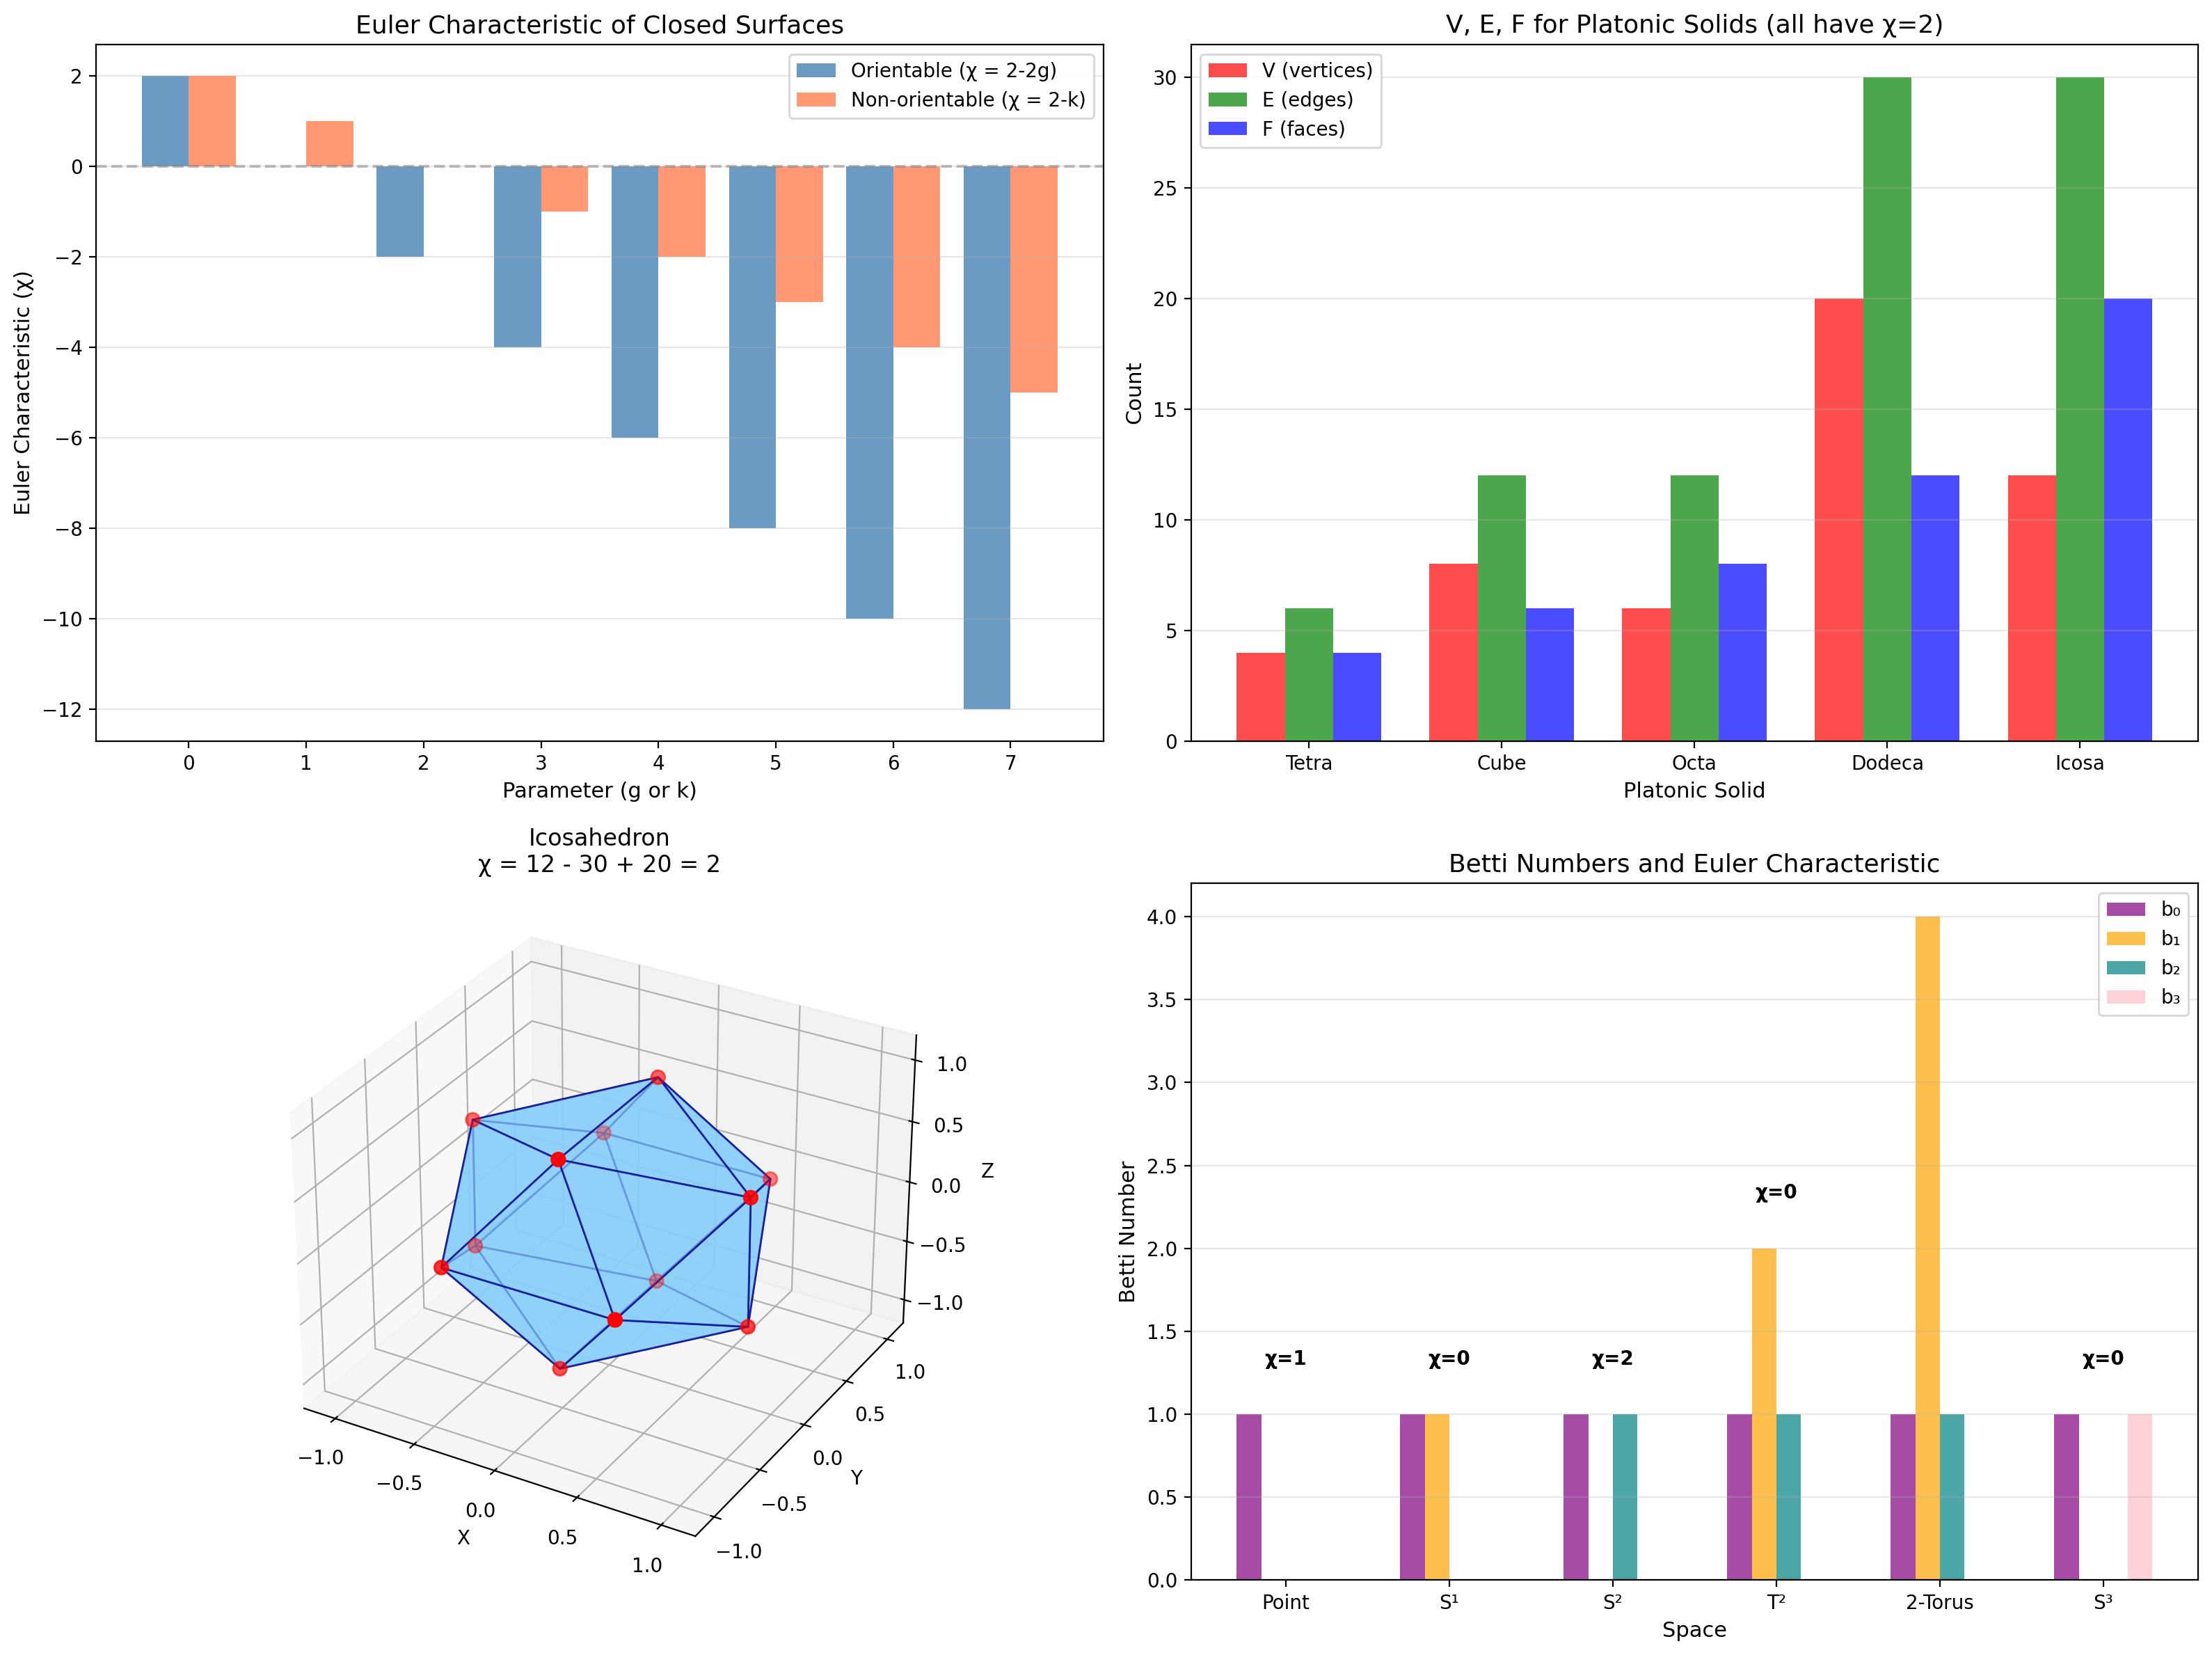


Comprehensive visualization saved to 'plot.png'


In [10]:
fig = plt.figure(figsize=(16, 12))

# Plot 1: Euler characteristic vs genus
ax1 = fig.add_subplot(2, 2, 1)
genera = np.arange(0, 8)
chi_orient = 2 - 2 * genera
chi_nonorient = 2 - genera

ax1.bar(genera - 0.2, chi_orient, 0.4, label='Orientable (χ = 2-2g)', color='steelblue', alpha=0.8)
ax1.bar(genera + 0.2, chi_nonorient, 0.4, label='Non-orientable (χ = 2-k)', color='coral', alpha=0.8)
ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax1.set_xlabel('Parameter (g or k)', fontsize=11)
ax1.set_ylabel('Euler Characteristic (χ)', fontsize=11)
ax1.set_title('Euler Characteristic of Closed Surfaces', fontsize=13)
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_xticks(genera)

# Plot 2: Platonic solids comparison
ax2 = fig.add_subplot(2, 2, 2)
solids = ['Tetra', 'Cube', 'Octa', 'Dodeca', 'Icosa']
V_vals = [4, 8, 6, 20, 12]
E_vals = [6, 12, 12, 30, 30]
F_vals = [4, 6, 8, 12, 20]

x = np.arange(len(solids))
width = 0.25

ax2.bar(x - width, V_vals, width, label='V (vertices)', color='red', alpha=0.7)
ax2.bar(x, E_vals, width, label='E (edges)', color='green', alpha=0.7)
ax2.bar(x + width, F_vals, width, label='F (faces)', color='blue', alpha=0.7)
ax2.set_xlabel('Platonic Solid', fontsize=11)
ax2.set_ylabel('Count', fontsize=11)
ax2.set_title('V, E, F for Platonic Solids (all have χ=2)', fontsize=13)
ax2.set_xticks(x)
ax2.set_xticklabels(solids)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: 3D Polyhedron
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
plot_polyhedron(ax3, ico_vertices, ico_faces, 
                'Icosahedron\nχ = 12 - 30 + 20 = 2', 'lightskyblue')

# Plot 4: Betti numbers and χ
ax4 = fig.add_subplot(2, 2, 4)
space_names = ['Point', 'S¹', 'S²', 'T²', '2-Torus', 'S³']
b0 = [1, 1, 1, 1, 1, 1]
b1 = [0, 1, 0, 2, 4, 0]
b2 = [0, 0, 1, 1, 1, 0]
b3 = [0, 0, 0, 0, 0, 1]
chi_list = [1, 0, 2, 0, -2, 0]

x = np.arange(len(space_names))
width = 0.15

ax4.bar(x - 1.5*width, b0, width, label='b₀', color='purple', alpha=0.7)
ax4.bar(x - 0.5*width, b1, width, label='b₁', color='orange', alpha=0.7)
ax4.bar(x + 0.5*width, b2, width, label='b₂', color='teal', alpha=0.7)
ax4.bar(x + 1.5*width, b3, width, label='b₃', color='pink', alpha=0.7)

# Add χ values as text
for i, chi in enumerate(chi_list):
    ax4.annotate(f'χ={chi}', (i, max(b0[i], b1[i], b2[i], b3[i]) + 0.3),
                ha='center', fontsize=10, fontweight='bold')

ax4.set_xlabel('Space', fontsize=11)
ax4.set_ylabel('Betti Number', fontsize=11)
ax4.set_title('Betti Numbers and Euler Characteristic', fontsize=13)
ax4.set_xticks(x)
ax4.set_xticklabels(space_names)
ax4.legend(loc='upper right')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('euler_characteristic_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nComprehensive visualization saved to 'plot.png'")

## Summary

The Euler characteristic $\chi$ is a fundamental topological invariant with remarkable properties:

1. **Computational Formula**: $\chi = V - E + F$ for polyhedra
2. **Homological Definition**: $\chi = \sum_i (-1)^i b_i$ using Betti numbers
3. **Classification Power**: Determines genus of orientable surfaces via $g = (2-\chi)/2$
4. **Geometric Connection**: Related to total curvature via Gauss-Bonnet theorem
5. **Algebraic Properties**: Multiplicative under products, additive under disjoint unions

The Euler characteristic bridges combinatorics, topology, and differential geometry, making it one of the most versatile invariants in mathematics.